In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Convertimos los rangos de redshift a fator de escala ya que los datos están distribuidos por este parámetro

In [2]:
redshift = [4,5,6,7,8]

for z in redshift:
    print("z = %i ===> a = %.5f"%(z, 1/(z+1)))

z = 4 ===> a = 0.20000
z = 5 ===> a = 0.16667
z = 6 ===> a = 0.14286
z = 7 ===> a = 0.12500
z = 8 ===> a = 0.11111


In [10]:
fac_escala = ["a0.109623.dat","a0.126498.dat","a0.141685.dat","a0.166998.dat","a0.202435.dat"]
fac_escala = fac_escala[::-1]

### Halo Mass Function

In [17]:
!head -n 10 "umachine-dr1/data/smhm/averages/hm_averages_a0.055623.dat"

"head" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [31]:
h = pd.read_csv("umachine-dr1/data/smhm/averages/hm_averages_"+fac_escala[0],skiprows=5,sep="\s")
h

C:\Users\santiago.arranz\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,#Bestfit_X_Counts,is,the,number,of,galaxies,of.1,type,X,in,the.1,bin,for,the.2,bestfit,model.
#Log10(SM_Center)(0),<Mh>(1),Err+(2),Err-(3),<Log(Mh)>(4),Err+(5),Err-(6),<WL(Mh)>(7),Err+(8),Err-(9),<Mh>(10),Err+(11),Err-(12),<Log(Mh)>(13),Err+(14),Err-(15),<WL(Mh)>(16),Err+(17),Err-(18),<Mh>(19),Err+(20),Err-(21),<Log(Mh)>(22),Err+(23),Err-(24),<WL(Mh)>(25),Err+(26),Err-(27),<Mh>(28),Err+(29),Err-(30),<Log(Mh)>(31),Err+(32),Err-(33),<WL(Mh)>(34),Err+(35),Err-(36),<Mh>(37),Err+(38),Err-(39),<Log(Mh)>(40),Err+(41),Err-(42),<WL(Mh)>(43),Err+(44),Err-(45),<Mh>(46),Err+(47),Err-(48),<Log(Mh)>(49),Err+(50),Err-(51),<WL(Mh)>(52),Err+(53),Err-(54),<Mh>(55),Err+(56),Err-(57),<Log(Mh)>(58),Err+(59),Err-(60),<WL(Mh)>(61),Err+(62),Err-(63),(64),HM_Left_Edge(65),HM_Right_Edge(66),Bestfit_Galaxy_Counts(67),Bestfit_Central_Counts(68),Bestfit_Central_SF_Counts(69),Bestfit_Central_Q_Counts(70),Bestfit_Satellite_Counts(71),Bestfit_SF_Counts(72),Bestfit_Q_Counts(73)
7.1,7.0149e+09,2.4655e+08,4.18282e+08,9.71546,0.0101852,0.0183592,6.35391e+09,1.97672e+08,3.35209e+08,6.80754e+09,2.13055e+08,3.98742e+08,9.70141,0.00876427,0.0175743,6.16064e+09,1.68856e+08,3.14931e+08,6.80754e+09,2.13243e+08,3.9874e+08,9.70141,0.00876331,0.0175743,6.16065e+09,1.68787e+08,3.14932e+08,3.60057e+09,3.67888e+09,6.88335e+08,9.4985,0.201623,0.0919304,3.47498e+09,2.96713e+09,6.26691e+08,9.53199e+09,5.41508e+08,6.27857e+08,9.88428,0.0187016,0.024066,8.85659e+09,4.61155e+08,5.5027e+08,7.0149e+09,2.46124e+08,4.18283e+08,9.71546,0.0101509,0.0183601,6.35391e+09,1.97314e+08,3.35207e+08,3.60057e+09,4.35939e+09,6.88335e+08,9.4985,0.246395,0.0897665,3.47498e+09,3.63524e+09,6.26691e+08,7,7.2,1.38295e+07,1.2777e+07,1.2777e+07,10,1.05251e+06,1.38295e+07,10,None
7.3,2.29342e+10,2.16417e+09,3.41348e+09,10.297,0.0403347,0.0724688,2.18341e+10,2.09875e+09,3.31473e+09,2.32802e+10,2.37494e+09,3.57724e+09,10.3019,0.0432806,0.0739088,2.21381e+10,2.30637e+09,3.4499e+09,2.32803e+10,2.37508e+09,3.57728e+09,10.3019,0.0432825,0.0738859,2.21383e+10,2.3049e+09,3.44958e+09,4.3299e+09,1.89407e+10,-3.41789e+08,9.63144,0.651739,-0.0265656,4.31302e+09,1.72028e+10,-3.444e+08,2.14058e+10,1.48664e+09,2.72463e+09,10.2751,0.0319052,0.0609961,2.0508e+10,1.44517e+09,2.61503e+09,2.29341e+10,2.16425e+09,3.41352e+09,10.297,0.0403023,0.0724592,2.18341e+10,2.10126e+09,3.31438e+09,3.27723e+10,-6.04358e+09,2.7987e+10,9.89405,0.404089,0.228703,2.01388e+10,4.05487e+09,1.53741e+10,7.2,7.4,579220,472303,472300,3,106917,579214,6,None
7.5,2.91198e+10,2.5707e+09,4.38805e+09,10.3976,0.03757,0.0749855,2.76673e+10,2.4613e+09,4.2606e+09,3.00373e+10,3.13562e+09,4.77594e+09,10.4094,0.0449409,0.0801191,2.85126e+10,2.98805e+09,4.60997e+09,3.00385e+10,3.06534e+09,4.7716e+09,10.4095,0.0449448,0.0801468,2.8514e+10,2.95018e+09,4.61108e+09,5.53625e+09,2.43199e+10,6.71273e+07,9.73108,0.487901,0.00362396,5.48852e+09,2.20568e+10,5.57317e+07,2.5638e+10,1.42834e+09,2.92267e+09,10.3526,0.0245543,0.0544109,2.45373e+10,1.40178e+09,2.8281e+09,2.91208e+10,2.57576e+09,4.38892e+09,10.3976,0.0375805,0.074852,2.76684e+10,2.46155e+09,4.26146e+09,7.30426e+09,2.30843e+10,1.75917e+09,9.79973,0.573548,0.0661345,6.90175e+09,2.17876e+10,1.40046e+09,7.4,7.6,452217,357906,357889,17,94311,452197,20,None
7.7,3.71941e+10,2.92258e+09,5.44553e+09,10.5017,0.0324697,0.071454,3.52924e+10,2.76901e+09,5.2533e+09,3.91148e+10,3.73918e+09,6.0009e+09,10.5237,0.0437698,0.0789175,3.71342e+10,3.59757e+09,5.80592e+09,3.91154e+10,3.68406e+09,5.99907e+09,10.5237,0.0437813,0.0789108,3.71351e+10,3.5984e+09,5.80602e+09,2.25884e+10,1.76458e+10,1.66982e+10,9.94513,0.380484,0.185714,1.53284e+10,2.2028e+10,9.48061e+09,3.07348e+10,1.66922e+09,3.50203e+09,10.4281,0.0221272,0.0528479,2.93327e+10,1.62004e+09,3.37464e+09,3.71948e+10,2.92812e+09,5.44405e+09,10.5018,0.0325785,0.0714417,3.52934e+10,2.77532e+09,5.25324e+09,1.88552e+10,1.92207e+10,1.29302e+10,9.91177,0.550102,0.151011,1.30415e+10,2.16561e+10,7.18569e+09,7.6,7.8,342444,263955,

### UV - SM

In [36]:
h = pd.read_csv("umachine-dr1/data/uvsm/uvsm_z3.5-z4.5.dat",skiprows=3,sep="\s")
h

C:\Users\santiago.arranz\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,#UV_Center,Median_SM,Err+,Err-,UV_Min,UV_Max
0,-23.75,2.645710e+11,1.010890e+11,8.327530e+10,-24.0,-23.5
1,-23.25,1.447760e+11,2.718590e+10,4.360790e+10,-23.5,-23.0
2,-22.75,8.031020e+10,9.450800e+09,2.238510e+10,-23.0,-22.5
3,-22.25,4.146550e+10,2.588320e+09,1.057430e+10,-22.5,-22.0
4,-21.75,1.897540e+10,1.272490e+09,4.539430e+09,-22.0,-21.5
5,-21.25,8.371810e+09,7.346360e+08,1.408040e+09,-21.5,-21.0
6,-20.75,4.038910e+09,4.939580e+08,6.151670e+08,-21.0,-20.5
7,-20.25,2.099030e+09,3.425160e+08,2.709780e+08,-20.5,-20.0
8,-19.75,1.153130e+09,2.226250e+08,1.395580e+08,-20.0,-19.5
9,-19.25,6.674500e+08,1.408660e+08,7.815730e+07,-19.5,-19.0


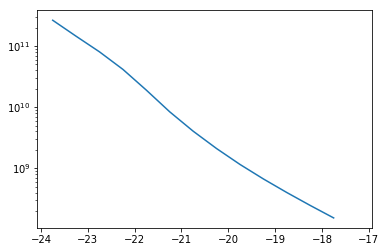

In [37]:
plt.plot(h["#UV_Center"],h["Median_SM"])
plt.yscale("log")

In [56]:
fink_a = pd.read_csv("Finkelstein/ApJ810_2015/apj810.tsv", sep=";", skiprows=53, index_col=None)
fink_b = pd.read_csv("Finkelstein/ApJ814_2015/apj814.tsv", sep=";", skiprows=72, index_col=None)

fink_a = fink_a.iloc[2:,:]
fink_b = fink_b.iloc[2:,:]

fink_a.ID = [i.replace(" ","") for i in fink_a.ID]

ids = fink_b["ID"].values
s = fink_a["ID"].isin(ids)
fink_a_b = fink_a[s]
fink_a_b=pd.merge(fink_a_b,fink_b,on=["ID","_RAJ2000","_DEJ2000","RAJ2000","DEJ2000"])
fink_a_b

,_RAJ2000,_DEJ2000,ID,HRG14,RAJ2000,DEJ2000,zphot,b_zphot,B_zphot,1500Mag,...,Age,b_Age,B_Age,E(B-V),b_E(B-V),B_E(B-V),SFR,b_SFR,B_SFR,Simbad
0,053.09684000,-27.86607389,z4_GSD_34736,HRG14 J033223.24-275157.9,053.096840,-27.866074,3.51,0.38,3.64,-21.36,...,10,19,101,0.34,0.18,0.34,451,109,434,Simbad
1,053.08689111,-27.84413889,z4_GSD_30292,HRG14 J033220.85-275038.9,053.086891,-27.844139,3.54,0.40,3.70,-21.03,...,57,49,90,0.24,0.16,0.32,132,64,322,Simbad
2,053.08736806,-27.83953500,z4_GSD_29028,HRG14 J033220.97-275022.3,053.087368,-27.839535,3.60,3.48,3.73,-21.03,...,80,80,101,0.10,0.06,0.10,38,25,40,Simbad
3,053.12141389,-27.81462111,z4_GSD_21002,HRG14 J033229.14-274852.6,053.121414,-27.814621,3.63,3.57,3.73,-21.18,...,30,10,30,0.18,0.16,0.24,93,70,152,Simbad
4,053.03123889,-27.78521500,z4_GSD_11269,HRG14 J033207.50-274706.8,053.031239,-27.785215,3.63,3.53,3.77,-21.30,...,49,40,101,0.10,0.10,0.24,45,43,176,Simbad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,189.35688806,+62.29531889,z7_GNW_24443,HRG14 J123725.65+621743.1,189.356888,+62.295319,6.66,6.48,6.77,-21.83,...,30,30,71,0.18,0.00,0.18,155,29,160,Simbad
114,189.03248611,+62.21641500,z7_GNW_17001,HRG14 J123607.80+621259.1,189.032486,+62.216415,6.84,6.58,7.03,-21.12,...,404,286,570,0.06,0.02,0.12,22,14,37,Simbad
115,189.36171000,+62.29437306,z7_GNW_24671,HRG14 J123726.81+621739.7,189.361710,+62.294373,6.93,6.27,7.38,-21.22,...,19,10,40,0.10,0.00,0.10,37,11,33,Simbad
116,189.27339194,+62.32478306,z7_GNW_19939,HRG14 J123705.61+621929.2,189.273392,+62.324783,7.24,6.81,7.69,-21.04,...,10,10,30,0.10,0.00,0.12,34,14,42,Simbad


In [57]:
fink_a_b.columns

Index(['_RAJ2000', '_DEJ2000', 'ID', 'HRG14', 'RAJ2000', 'DEJ2000', 'zphot',
       'b_zphot', 'B_zphot', '1500Mag', 'b_1500Mag', 'B_1500Mag', 'z', 'b_z',
       'B_z', 'logM*', 'b_logM*', 'B_logM*', 'Age', 'b_Age', 'B_Age', 'E(B-V)',
       'b_E(B-V)', 'B_E(B-V)', 'SFR', 'b_SFR', 'B_SFR', 'Simbad'],
      dtype='object')

In [72]:
fink_a_b["1500Mag"].astype(float).min()

-22.7